In [1]:
pip install sqlalchemy

In [2]:
import pandas as pd
import sqlalchemy
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
server = r'DESKTOP-FEC13P5\SQLEXPRESS'
database = 'ABC_Pharmaceutical'
connection_string = f'mssql+pyodbc://{server}/{database}?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server'

In [43]:
engine = sqlalchemy.create_engine(connection_string)

In [51]:
try:
    engine = sqlalchemy.create_engine(connection_string)
    with engine.connect() as connection:
        print("Connection successful!")
except Exception as e:
    print("Error connecting to the database:", e)

Connection successful!


In [65]:
sales_query = "SELECT * FROM dbo.sales_main"

In [67]:
sales_data = pd.read_sql(sales_query, engine)

# Data Validation

In [69]:
def validate_data(df):
    print("Data Types:\n", df.dtypes)
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nDuplicate Rows:\n", df.duplicated().sum())
    print("\nBasic Statistics:\n", df.describe())

In [71]:
print("Sales Data Validation:")
validate_data(sales_data)

Sales Data Validation:
Data Types:
 SalesID          object
Distributor      object
CustomerName     object
City             object
Country          object
Latitude         object
Longitude        object
ProductID       float64
ChannelID       float64
Channel          object
Product Name     object
Quantity         object
Price           float64
Sales           float64
Month            object
Year             object
SalesRepID      float64
Manager          object
dtype: object

Missing Values:
 SalesID         0
Distributor     0
CustomerName    0
City            0
Country         0
Latitude        0
Longitude       0
ProductID       0
ChannelID       0
Channel         0
Product Name    0
Quantity        0
Price           0
Sales           0
Month           0
Year            0
SalesRepID      0
Manager         0
dtype: int64

Duplicate Rows:
 0

Basic Statistics:
           ProductID     ChannelID         Price         Sales    SalesRepID
count  1.177950e+06  1.177950e+06  1.177950e+06

# Exploratory Data Analysis (EDA)

In [88]:
print(sales_data.head())

  SalesID Distributor                      CustomerName        City  Country  \
0  152048     Koss                Erdman PLC Pharma Plc     Freital  Germany   
1  152048     Koss                Erdman PLC Pharma Plc     Freital  Germany   
2  152049     Koss     Hermiston LLC Pharmaceutical Ltd  Weingarten  Germany   
3  152049     Koss     Hermiston LLC Pharmaceutical Ltd  Weingarten  Germany   
4  152049     Koss     Hermiston LLC Pharmaceutical Ltd  Weingarten  Germany   

  Latitude Longitude  ProductID  ChannelID   Channel           Product Name  \
0  51.0167     13.65      238.0        4.0  Hospital  Cephozumab Synmethate   
1  51.0167     13.65      238.0        4.0  Hospital  Cephozumab Synmethate   
2  47.8078    9.6417       59.0        2.0  Pharmacy  Alemtuvatol Megalinum   
3  47.8078    9.6417       59.0        2.0  Pharmacy  Alemtuvatol Megalinum   
4  47.8078    9.6417       59.0        2.0  Pharmacy  Alemtuvatol Megalinum   

  Quantity  Price     Sales    Month        

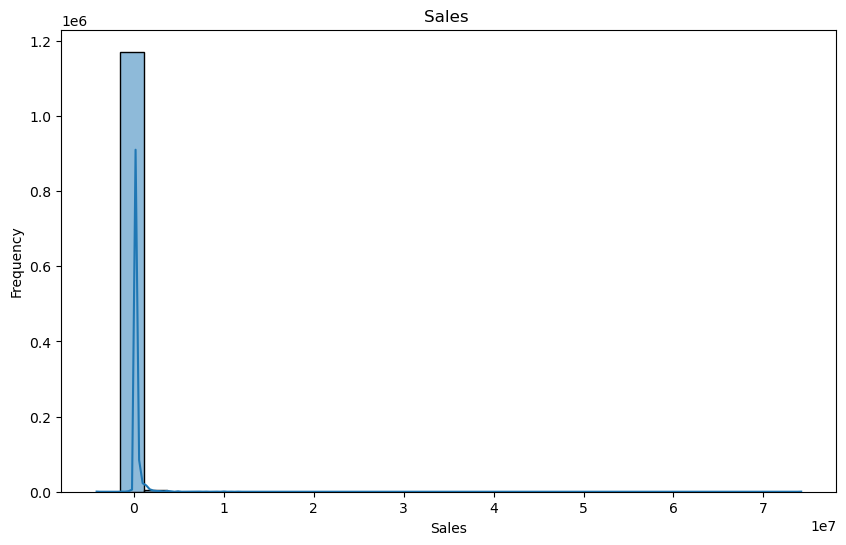

In [102]:
# Data Distributions
plt.figure(figsize=(10, 6))
sns.histplot(sales_data['Sales'], bins=30, kde=True)
plt.title('Sales ')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

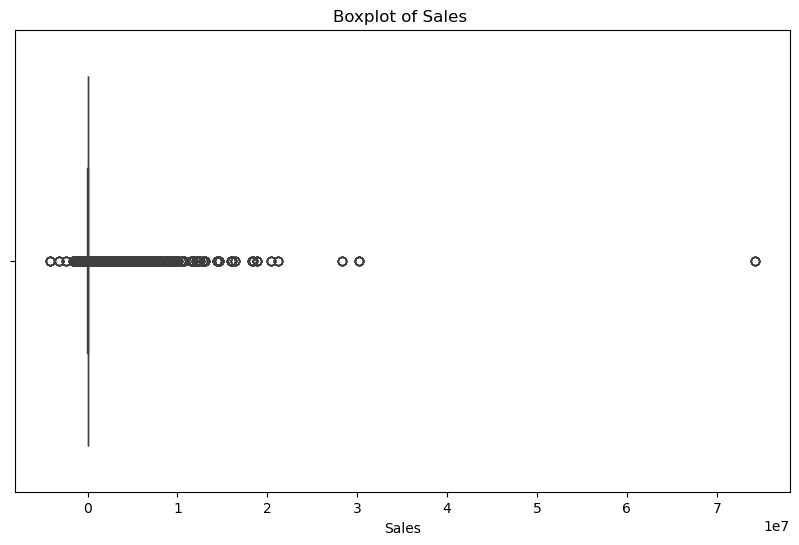

In [106]:
# Identify Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=sales_data['Sales'])
plt.title('Boxplot of Sales ')
plt.xlabel('Sales')
plt.show()

In [112]:
# Analyze Sales Data by Year, Product, and Region
sales_data['Year'] = pd.to_datetime(sales_data['Year']).dt.year

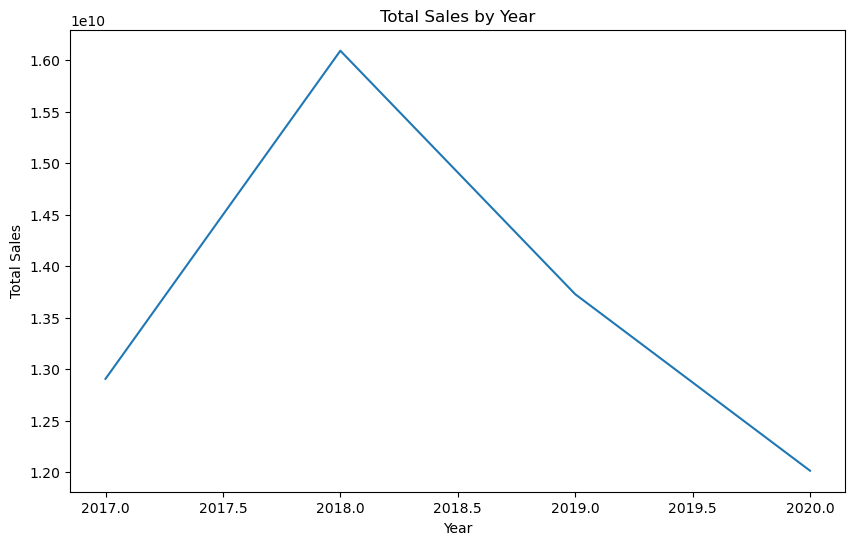

In [114]:
# Sales by Year
sales_by_year = sales_data.groupby('Year')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_by_year, x='Year', y='Sales')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()